Sylwia Kwiatkowska, sprawozdanie 3

In [31]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as scp
import time



def f(x):
    return math.exp(-2*x) + x**2 - 1

#pierwsza pochodna
def f1(x):
    return -2*math.exp(-2*x) + 2*x

#druga pochodna
def f2(x):
    return 4*math.exp(-2*x) + 2


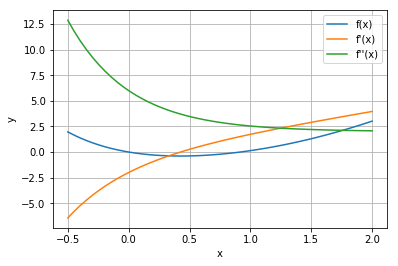

In [32]:
#zad 1
x = np.linspace(-0.5,2)
y = []
for i in x:
    y.append(f(i))
y2 = []
for i in x:
    y2.append(f1(i))
y3 = []
for i in x:
    y3.append(f2(i))
plt.plot(x,y, label="f(x)")
plt.plot(x,y2, label="f'(x)")
plt.plot(x,y3, label="f''(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

#Wartości pierwiastków w okolicach 0 i 1
#przedziały:[-0.5;0.5] i [0.5;1.5]

In [33]:
#zad 2 Metoda bisekcji

def bisec(fun, a, b, dokl, n): #n - max. liczba iteracji
    it=0
    if(f(a) * f(b) > 0):
        print("Zle dobrany przedzial")
        return None
    while (math.fabs(b-a) >= dokl and it<n):
        c = a+(b-a)/2
        if(f(c)==0):
            return c, it
        if(fun(a)*fun(c)<0):
            b = c
        else:
            a = c
        it = it + 1
    return c, it

#pierwszy pierwiastek:
print(bisec(f,-0.5,0.5,10**(-10), 1000))


#drugi pierwiastek
curt = time.time()
print(bisec(f,0.5,1.5,10**(-10), 1000))
curt2 = time.time()
time_bisec = curt2-curt
print(scp.bisect(f,0.5,1.5,xtol=10**-10,maxiter=1000))
curt3 = time.time()

print(str(time_bisec)+ "  funkcja własna")
print(str(curt3-curt2)+ "  funkcja biblioteczna")
"""
Warunki wystarczające zbieżności metody w przedziale izolacji pierwiastka:
funkcja f(x) jest ciągła w przedziale domkniętym [a;b]
funkcja przyjmuje różne znaki na końcach przedziału: f(a)*f(b)<0
"""


(0.0, 0)
(0.9165625831228681, 34)
0.9165625831228681
0.0  funkcja własna
0.0004987716674804688  funkcja biblioteczna


'\nWarunki wystarczające zbieżności metody w przedziale izolacji pierwiastka:\nfunkcja f(x) jest ciągła w przedziale domkniętym [a;b]\nfunkcja przyjmuje różne znaki na końcach przedziału: f(a)*f(b)<0\n'

In [34]:
#zad 3 Metoda stycznych (Newtona)
#punkt startowy obliczeń - ten koniec przedziału [a,b], dla którego zachodzi f(x0)*f''(x0) > ,x0 = a lub x0 = b

def znajdz_pkt_start(fun, fun2, a,b):
    if (fun(a)*fun2(a) > 0):
        return a
    elif (fun(b)*fun2(b) > 0):
        return b
    else:
        return None
    


    
def newt_raph(fun, fun1, pkt_start, dokl, n):
    print("Punkt startowy: ", pkt_start)
    it = 0
    x = pkt_start
    x1 = float("inf") #aby uruchomić petle while po raz pierwszy

    while (math.fabs(x - x1) >= dokl and it < n):
        x1 = x
        x = x - (fun(x) / fun1(x))
        it = it + 1
    return x, it
    


#pierwszy pierwiastek
print(newt_raph(f, f1, znajdz_pkt_start(f,f2,-0.5,0.5), 10**-10, 1000))
print("\noptimize.newton: ")
print(scp.newton(f,-0.5,f1 ,tol=10**-10,maxiter=1000))
print()
#drugi pierwiastek
curt = time.time()
print(newt_raph(f, f1, 0.5, 10**-10, 1000))
curt2 = time.time()
time_newt = curt2-curt

print("\noptimize.newton: ")
print(scp.newton(f,0.5,f1 ,tol=10**-10,maxiter=1000))
curt3 = time.time()

print()
print(str(time_newt)+ "  funkcja własna")
print(str(curt3-curt2)+ "  funkcja biblioteczna")

"""
Warunki wystarczające zbieżności metody dla ustalonego punktu startowego:
W przedziale [a,b] znajduje się dokładnie jeden pierwiastek.
Funkcja ma różne znaki na krańcach przedziału, tj. f(a)*f(b)<0.
Pierwsza i druga pochodna funkcji mają stały znak w tym przedziale.

"""


Punkt startowy:  -0.5
(-5.125559246038141e-17, 6)

optimize.newton: 
-5.125559246038141e-17

Punkt startowy:  0.5
(0.916562583105698, 7)

optimize.newton: 
0.916562583105698

0.0004987716674804688  funkcja własna
0.0  funkcja biblioteczna


'\nWarunki wystarczające zbieżności metody dla ustalonego punktu startowego:\nW przedziale [a,b] znajduje się dokładnie jeden pierwiastek.\nFunkcja ma różne znaki na krańcach przedziału, tj. f(a)*f(b)<0.\nPierwsza i druga pochodna funkcji mają stały znak w tym przedziale.\n\n'

In [35]:
#zad 4 metoda siecznych
def secant(fun, x0, x1, eps, n):
    it = 0
    while abs(x1-x0) > eps and it < n:
        x2 = x1 - (fun(x1))*(x1 - x0)/(fun(x1) - fun(x0))
        x0 = x1
        x1 = x2
        it = it + 1
    return x2, it

#pierwszy pierwiastek
print(secant(f, -0.5,0.5, 10**-10, 1000))
print("\noptimize.newton: ")
print(scp.newton(f,-0.5, f1 ,tol=10**-10,maxiter=1000))
print()
#drugi pierwiastek
curt = time.time()
print(secant(f, 0.5,1.5, 10**-10, 1000))
curt2 = time.time()
time_sec = curt2-curt

print("\noptimize.newton: ")
print(scp.newton(f,0.5, f1 ,tol=10**-10,maxiter=1000))
curt3 = time.time()

print()
print(str(time_sec)+ "  funkcja własna")
print(str(curt3-curt2)+ "  funkcja biblioteczna")



"""
Warunki wystarczające zbieżności metody dla ustalonego punktu startowego:
W przedziale [a,b] znajduje się dokładnie jeden pierwiastek.
Funkcja ma różne znaki na krańcach przedziału, tj. f(a)*f(b)<0.
Pierwsza i druga pochodna funkcji mają stały znak w tym przedziale.

"""


(-3.4071884777057885e-17, 15)

optimize.newton: 
-5.125559246038141e-17

(0.916562583105698, 8)

optimize.newton: 
0.916562583105698

0.0004963874816894531  funkcja własna
0.0014972686767578125  funkcja biblioteczna


'\nWarunki wystarczające zbieżności metody dla ustalonego punktu startowego:\nW przedziale [a,b] znajduje się dokładnie jeden pierwiastek.\nFunkcja ma różne znaki na krańcach przedziału, tj. f(a)*f(b)<0.\nPierwsza i druga pochodna funkcji mają stały znak w tym przedziale.\n\n'

In [36]:
print(time_bisec)
print(time_newt)
print(time_sec)

"""
Porównanie:
-metoda bisekcji - najwięcej iteracji - zbieżność wolna, liniowa
-metoda siecznych - zbieżność pośrednia, superliniowa
-metoda stycznych - najmniej iteracji - zbieżność najszybsza, kwadratowa
"""

0.0
0.0004987716674804688
0.0004963874816894531


'\nPorównanie:\n-metoda bisekcji - najwięcej iteracji - zbieżność wolna, liniowa\n-metoda siecznych - zbieżność pośrednia, superliniowa\n-metoda stycznych - najmniej iteracji - zbieżność najszybsza, kwadratowa\n'